# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [2]:
frame_og= pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
r= requests.get(" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [4]:
with open("image.tsv", "wb") as file:
    file.write(r.content)

In [5]:
frame_image= pd.read_csv("image.tsv", sep="\t")

In [6]:
frame_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#I didn't get the chance to access the Twitter Api, So I used the file provided by Udacity
r= requests.get("https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt")
with open("text.json", "wb") as file:
    file.write(r.content)
frame_tweepy= pd.read_json("text.json", lines=True)
frame_tweepy.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)

In [8]:
frame_image.to_csv("frame_images.csv")
frame_tweepy.to_csv("frame_tweepy.csv")

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
frame_og.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2215,668542336805281792,NaN,NaN,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There's a lot going on here but in my honest o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668542336...,10,10,None,None,None,None,None
1636,684200372118904832,NaN,NaN,2016-01-05 02:30:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Gang of fearless hoofed puppers here. Straight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684200372...,6,10,None,None,None,None,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
1730,679854723806179328,NaN,NaN,2015-12-24 02:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He's a rare pup. Covered in Fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679854723...,7,10,Bruce,None,None,None,None


In [10]:
frame_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
frame_og[frame_og.rating_numerator.between(16,1000)]['rating_numerator']

55       17
188     420
189     666
290     182
313     960
340      75
433      84
516      24
695      75
763      27
902     165
1120    204
1202     50
1228     99
1254     80
1274     45
1351     60
1433     44
1634    143
1635    121
1663     20
1712     26
1779    144
1843     88
2074    420
Name: rating_numerator, dtype: int64

In [12]:
frame_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
frame_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
frame_image.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1909,852912242202992640,https://pbs.twimg.com/media/C9YnKK3VoAAxn1E.jpg,1,Great_Dane,0.783765,True,Rhodesian_ridgeback,0.114147,True,English_foxhound,0.04644,True


In [15]:
frame_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [16]:
frame_tweepy.iloc[:,:5].head()

,contributors,coordinates,created_at,display_text_range,entities
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ..."


In [17]:
frame_tweepy.in_reply_to_screen_name.unique()

array([None, 'NonWhiteHat', 'roushfenway', 'RealKentMurphy',
       'ComplicitOwl', 'Jack_Septic_Eye', 'dog_rates', 'Marc_IRL',
       'xianmcguire', 'dhmontgomery', 's8n', 'markhoppus', '0_kelvin_0',
       'bragg6of8', 'jonnysun', 'docmisterio', 'UNC', 'HistoryInPics',
       'imgur', 'NBCSports', 'SkyWilliams', 'JODYHiGHROLLER', 'shibbnbot',
       'TheEllenShow', 'spaghemily', 'mount_alex3', 'serial', 'ABC',
       'CommonWhiteGirI', 'LightningHoltt', 'ABC7', 'wane15'], dtype=object)

### Quality issues
1. `frame_og` Timestamp column is an object not a datetime serie which it should be to facilitate calculations.

2. `frame_og` Retweeted_time_stamp is an object rather than being a datetime object.

3. `frame_og` The numerator and denominator have excessive rates which can compromise our calculations; we need to remove those outliers.

4. `frame_image` The text_range column is an object rather than being an integer and since the ranges all start from 0 to something, we don't need that starting 0.

5.  `frame_tweepy` has entities column with a useful "hashtag" and "user_mentions" json element that we need to extract. 

7. `frame_image` We need a single column with the type of dog with the highest probability rate starting from p1(with the highest probability) to p3.  

8. `frame_tweepy`From the instructions, I know that we will only need data with images and not retweets. Those are the data in *frame_tweepy* which have something in its retweeted_status.

9. `frame_tweepy` Drop all the unnecessary columns in frame_tweepy (including the retweeted rows) and merge it with the other dataframe

### Tidiness issues
1. *frame_og* We have columns doggo, floofer, pupper, puppo which refers to a type of dog and that should be a single observation, not many columns.

2.  The original dataframe and the dataframe with images and their machine-learning estimations should be one datafframe as they are one observation unit.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
frame_og_copy= frame_og.copy()
frame_image_copy= frame_image.copy()
frame_tweepy_copy= frame_tweepy.copy()

### Quality:

### Issue #1:

#### Define: `frame_og` Clear the "+0000" at the end of each time stamp and make the timestamp column a date time object using date time function.

#### Code

In [19]:
from datetime import datetime
#Removing the last five characters
frame_og.timestamp = frame_og.timestamp.str[:-5]

frame_og.timestamp = pd.to_datetime(frame_og.timestamp, format="%Y-%m-%d %H:%M:%S")

#### Test

In [20]:
print(frame_og.timestamp.dtype)
frame_og.timestamp.head(5)

datetime64[ns]


0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

### Issue #2:

#### Define: `frame_og`  Clear the last "+0000" characters and make the retweeted_timestamp column a datetime object using datetime function of pandas

#### Code

In [21]:
frame_og.retweeted_status_timestamp = frame_og.retweeted_status_timestamp.str[:-5]
frame_og.retweeted_status_timestamp = pd.to_datetime(frame_og.retweeted_status_timestamp, format="%Y-%m-%d %H:%M:%S")

#### Test

In [22]:
print(frame_og.retweeted_status_timestamp.dtype)
frame_og.retweeted_status_timestamp.unique()[:5]

datetime64[ns]


array(['NaT', '2017-07-19T00:47:34.000000000',
       '2017-07-15T02:44:07.000000000', '2017-02-12T01:04:29.000000000',
       '2017-06-23T01:10:23.000000000'], dtype='datetime64[ns]')

### Issue #3:

#### Define: `frame_og` Set all denominators to 10.

#### Code

In [23]:
frame_og.rating_denominator = frame_og.rating_denominator = 10

#### Test

In [24]:
frame_og.rating_denominator.head()

0    10
1    10
2    10
3    10
4    10
Name: rating_denominator, dtype: int64

### Issue #4:

#### Define: `frame_tweepy` Extract the difference from the contained tuple using .str

#### Code

In [25]:
frame_tweepy.display_text_range= frame_tweepy.display_text_range.str[1] - frame_tweepy.display_text_range.str[0]

#### Test

In [26]:
frame_tweepy.display_text_range.head()

0     85
1    138
2    121
3     79
4    138
Name: display_text_range, dtype: int64

### Issue #5:

#### Define: Extract the hashtag json element in the column (entities) and then get a bool for when a tweet has a hashtag

#### Code

In [27]:
list= []
for i in range(len(frame_tweepy.index)) :
    list.append(frame_tweepy.entities[i]['hashtags'] != [])
frame_tweepy["hashtag"] = list

#### Test

In [28]:
frame_tweepy.hashtag.head()

0    False
1    False
2    False
3    False
4     True
Name: hashtag, dtype: bool

### Issue #6:

#### Define: Use series of if conditionals to retrieve the breed type starting from p1 to p3

#### Code

In [29]:
dog_bool = []
for i in range(len(frame_image.index)):
    if frame_image.iloc[i].p1_dog == True:
        dog_bool.append(frame_image.iloc[i].p1)
    elif frame_image.iloc[i].p2_dog == True:
        dog_bool.append(frame_image.iloc[i].p2)
    elif frame_image.iloc[i].p3_dog == True:
        dog_bool.append(frame_image.iloc[i].p3)
    else:
        dog_bool.append("none")
frame_image["breed_type"] = dog_bool

#Dropping the rest of the columns
frame_image = frame_image[["tweet_id" ,"jpg_url" ,"breed_type"]]

#### Test

In [30]:
frame_image.head()

,tweet_id,jpg_url,breed_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


### Issue #7:

#### Define: Drop rows with retweeted_status having something and drop the column with all the other that are unnecessary.

#### Code

In [31]:
#Dropping the retweeted rows
mask = frame_tweepy.retweeted_status.notnull()
frame_tweepy.drop(frame_tweepy[mask].index, axis=0)

#Dropping the rest of columns
frame_tweepy = frame_tweepy[["created_at","favorite_count","retweet_count","id","hashtag","display_text_range"]]

#### Test

In [32]:
frame_tweepy.head()

,created_at,favorite_count,retweet_count,id,hashtag,display_text_range
0,2017-08-01 16:23:56,39467,8853,892420643555336193,False,85
1,2017-08-01 00:17:27,33819,6514,892177421306343426,False,138
2,2017-07-31 00:18:03,25461,4328,891815181378084864,False,121
3,2017-07-30 15:58:51,42908,8964,891689557279858688,False,79
4,2017-07-29 16:00:24,41048,9774,891327558926688256,True,138


### Issue #8:

#### Define: Merge 'frame_og' with 'frame_tweepy' to form a new dataframe 'df'

#### Code

In [33]:
df = frame_og.merge(frame_tweepy, how="inner", left_on="tweet_id", right_on="id")

#Dropping the "id" column from 'image_twepy'
df.drop(columns="id", axis=1, inplace=True)

#### Test

In [34]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,created_at,favorite_count,retweet_count,hashtag,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,2017-08-01 16:23:56,39467,8853,False,85
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,2017-08-01 00:17:27,33819,6514,False,138


### Tidiness:

### Issue #1:

#### Define: Use if conditionals toextract the name of the dog in the 'doggo', 'puppo', 'pupper', 'floofer' columns

#### Code

In [35]:
typo = []
for i in range(len(df.index)):
    if df.doggo[i] !="None":
        typo.append(df.doggo[i])
    elif df.floofer[i] !="None": 
        typo.append(df.floofer[i])
    elif df.pupper[i] !="None":  
        typo.append(df.pupper[i])
    elif df.puppo[i] !="None":    
        typo.append(df.puppo[i])
    else:
        typo.append("none")
df["dog_type"] = typo

#Dropping the 'doggo', 'puppo', 'pupper', 'floofer' columns
df.drop(columns=['doggo', 'puppo', 'pupper', 'floofer'], inplace=True)

#### Test

In [36]:
df.dog_type.unique()

array(['none', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Issue #2:

#### Define: Merge 'frame_image' to the new 'df' 

#### Code

In [37]:
df = df.merge(frame_image, how="inner", on="tweet_id")

#### Test

In [38]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,created_at,favorite_count,retweet_count,hashtag,display_text_range,dog_type,jpg_url,breed_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,2017-08-01 16:23:56,39467,8853,False,85,none,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,2017-08-01 00:17:27,33819,6514,False,138,none,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
df.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [40]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,display_text_range
count,2.073000e+03,2.300000e+01,2.300000e+01,7.900000e+01,7.900000e+01,2073.000000,2073.0,2073.000000,2073.000000,2073.000000
mean,7.383634e+17,6.978112e+17,4.196984e+09,7.663364e+17,9.967874e+15,12.265798,10.0,8556.718283,2976.089243,111.586589
std,6.780118e+16,4.359384e+16,0.000000e+00,5.882530e+16,8.859637e+16,40.699924,0.0,12098.640994,5054.897526,26.261775
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,10.0,0.000000,16.000000,13.000000
25%,6.764706e+17,6.732411e+17,4.196984e+09,7.124037e+17,4.196984e+09,10.000000,10.0,1674.000000,634.000000,94.000000
50%,7.119681e+17,6.757073e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.0,3864.000000,1408.000000,116.000000
75%,7.931959e+17,7.031489e+17,4.196984e+09,8.068680e+17,4.196984e+09,12.000000,10.0,10937.000000,3443.000000,137.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,10.0,132810.000000,79515.000000,148.000000


In [41]:
df.dog_type.value_counts()

none       1753
pupper      210
doggo        80
puppo        23
floofer       7
Name: dog_type, dtype: int64

- What breed type got the most favorited? 

        Here are the top 10:

In [42]:
(df
 .groupby(by=["breed_type"])
 .favorite_count.sum()
 .sort_values(ascending=False)
 .head(11)[1:]
)

breed_type
golden_retriever      1946934
Labrador_retriever    1274526
Pembroke              1039484
Chihuahua              746604
Samoyed                583906
French_bulldog         570921
chow                   446933
cocker_spaniel         407412
pug                    383817
toy_poodle             339068
Name: favorite_count, dtype: int64

- How about retweets now? 
        
        Here are the top 1o:

In [43]:
(df
 .groupby(by=["breed_type"])
 .retweet_count.sum()
 .sort_values(ascending=False)
 .head(11)[1:]
)

breed_type
golden_retriever      702286
Labrador_retriever    468234
Chihuahua             335330
Pembroke              292052
Samoyed               248466
cocker_spaniel        206032
French_bulldog        168748
chow                  144744
pug                   132330
toy_poodle            118738
Name: retweet_count, dtype: int64

### Insights:
1. Golden Retrievers, Labrador Retrievers and Pembrokes (and also Chihuahuas) are the most favorited breed according to the data; They should be more posted to drive more engagement and hence attract more followers!

2. Wednesday is the most engaging day! Not only do users retweet more but they also like more on that day. That means that anything done on that day can be more impactful than the other days; example like an exclusive ad or an important announcement.  
3. People tend to retweet most when a post is posted from midnight and up to 1am, or at 4pm and upto 5pm; This is the sweet spot to have more engagement from their audience. 
>I suppose this happens because people usually get home from work at 4pm and they get to sleep around midnight. Or maybe their feed are not overcrowded at those hours, so it's easier to catch their attention.

4. It can seem trivial or not that important, but including a hashtag in a tweet improves the likeliness of the tweet getting in front of the right audience and the audience engaging more with the tweet. This was well shown by the data when comparing tweets with and tweets without hashtags.

5. There's a sweet spot somewhere between 110 and 140 text range that somehow seems to create more likes and retweets. This could be because these dog lovers are literate people or maybe that it's just random, but effective.

### Visualization

In [44]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,created_at,favorite_count,retweet_count,hashtag,display_text_range,dog_type,jpg_url,breed_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,2017-08-01 16:23:56,39467,8853,False,85,none,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,2017-08-01 00:17:27,33819,6514,False,138,none,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,2017-07-31 00:18:03,25461,4328,False,121,none,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,2017-07-30 15:58:51,42908,8964,False,79,none,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,2017-07-29 16:00:24,41048,9774,True,138,none,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


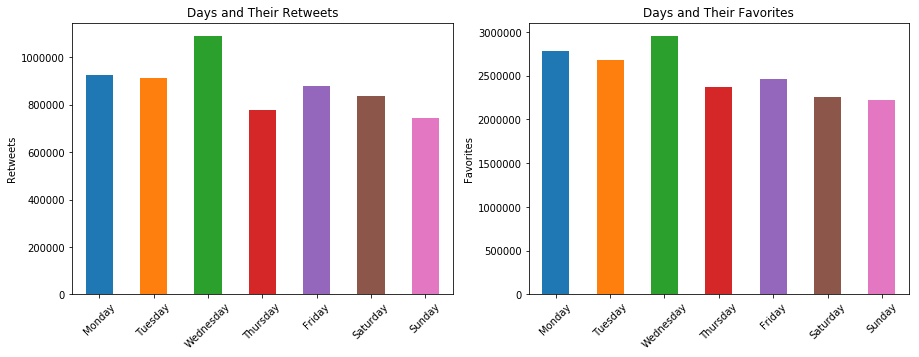

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df["day"] = df.timestamp.dt.dayofweek
df.groupby(by="day").retweet_count.sum().plot(kind="bar", title="Days and Their Retweets", ax=ax1)

#Setting labels
plt.xlabel("")
plt.ylabel("Retweets")

#Setting the tick labels
squad = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax1.set_xticklabels(squad, minor=False, rotation=45)
ax1.set(xlabel='', ylabel='Retweets');

#The 2nd plot
df.groupby(by="day").favorite_count.sum().plot(kind="bar", title="Days and Their Favorites", ax=ax2, )

#Setting the tick labels
squad = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax2.set_xticklabels(squad, minor=False, rotation=45)
ax2.set(xlabel='', ylabel='Favorites');

What is the relationship between like and retweet here? Is there a perfect correlation?

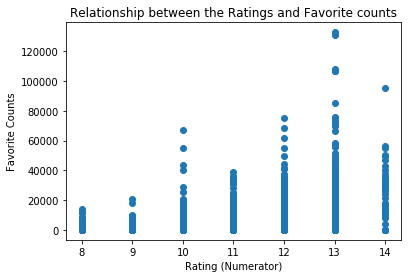

In [46]:
low, high= df.rating_numerator.quantile([.1,.99])
m= df.rating_numerator.between(low, high)
plt.scatter(x= df[m].rating_numerator, y=df[m].favorite_count)
plt.title("Relationship between the Ratings and Favorite counts")
plt.xlabel("Rating (Numerator)")
plt.ylabel("Favorite Counts");

Does having a hashtag influence more or less the engagement from the audience?

Text(0.5,0,'Tweet with a Hashtag')

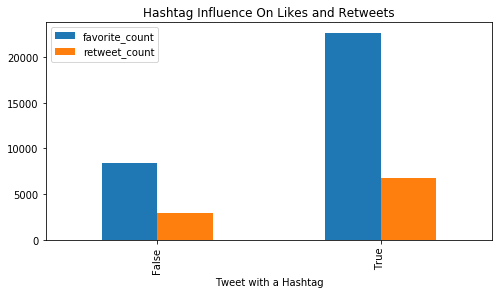

In [47]:
df[["hashtag","favorite_count","retweet_count"]].groupby(by="hashtag").mean().plot(kind="bar",title="Hashtag Influence On Likes and Retweets", figsize=(8,4))
plt.xlabel("Tweet with a Hashtag")

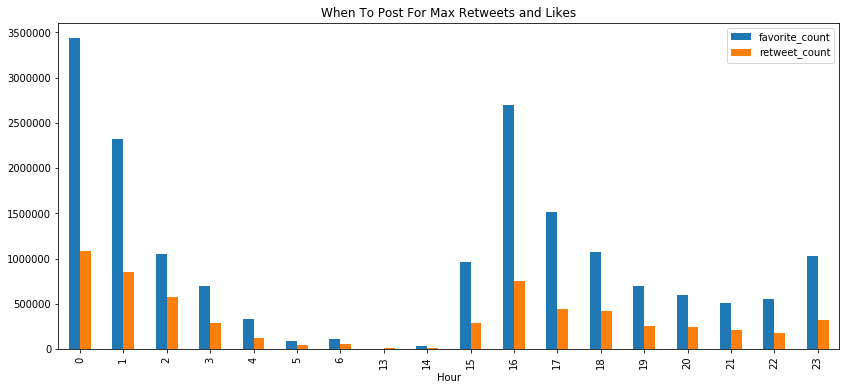

In [48]:
df["hour"] = df.timestamp.dt.hour
df[["hour","favorite_count","retweet_count"]].groupby(by="hour").sum().plot.bar(figsize=(14,6), title="When To Post For Max Retweets and Likes")
plt.xlabel("Hour");

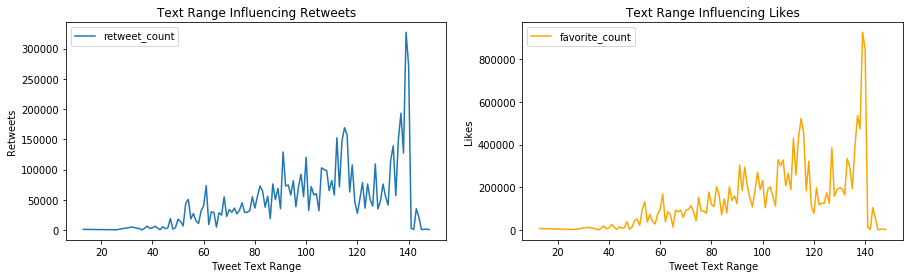

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
df[["display_text_range","retweet_count"]].groupby(by="display_text_range").sum().plot(title="Text Range Influencing Retweets", ax=ax1)
df[["display_text_range","favorite_count"]].groupby(by="display_text_range").sum().plot(color="orange", title="Text Range Influencing Likes", ax=ax2)
ax1.set(xlabel='Tweet Text Range', ylabel='Retweets')
ax2.set(xlabel='Tweet Text Range', ylabel='Likes');

Footnotes

<a name="cite_note-1"></a>1. [^](#cite_ref-1) I was inspired [ here](https://stackoverflow.com/questions/36837663/reading-json-file-as-pandas-dataframe-error "Stackoverflow example") 

<a name="cite_note-2"></a>2. [^](#cite_ref-2) I was inspired [ here](https://www.naukri.com/learning/articles/working-with-date-and-time-in-pandas/#:~:text=Pandas%20has%20a%20built%2Din,format%20to%20a%20DateTime%20object.&text=As%20you%20can%20see%2C%20the,of%20a%20string%2Dtype%20object.&text=Thus%2C%20to_datetime()%20converts%20the,of%20the%20appropriate%20datetime64%20dtype "Naukri's datetime tutorial")